In [1]:
# project: p1
# submitter: ebbartels
# partner: none
# hours: 15


In [2]:
import copy
import json
import os
import pandas as pd
import matplotlib.pylab  as plt
import subprocess
import random
import numpy as np
import time

In [3]:
#Q1
type(8/3)

float

In [4]:
#Q2

x = 4
maximum = 15
minimum = 5
error = (minimum > x or x > maximum) # False if x is inside the minimum-to-maximum range
error


True

In [5]:
#Q3

word = "QUOTIDIAN"
suffix_match = 'ian' == word[-3:].lower() # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match


True

In [6]:
def check_sum(x=0, y=0, sum=0):
    if x + y == sum:
        return True
    else:
        return False

In [7]:
#Q4

check_sum(0.1, 0.2, 0.3)


False

In [8]:
#Q5 
check_sum(1,-1)

True

In [9]:
#Q6

x = 4
if x%2 ==1:
    status = "odd"
elif x%2 == 0:
    status = "even"
else:
    status = "non-integer"
status


'even'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)


3
4
1
6


In [11]:
def neg_sum(nums):
    total = 0
    for num in nums:
        if num > -1:
            continue
        elif total < -20:
            continue
        else:
            total += num
    return total

In [12]:
#Q7

neg_sum(nums)

0

In [13]:
#Q8

neg_sum([-5, 1, -11, -6, 15, -1, 8, 2])

-22

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]


In [15]:
{"A":1, "B":2} == {"B":2, "A":1}

True

In [16]:
#Q9

coord3['w'] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [17]:
#Q10

rows[0][-1]["x"]

8

In [18]:
#Q11


v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404

rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [19]:
#Q12

idx = header.index('B')
total = 0
for row in rows:
    total += row[idx]
total

412

In [20]:
#Q13

def get_column_b(row):
    return row[header.index("B")]

rows.sort(key=get_column_b, reverse=False)
rows


[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [21]:
#Q14

f = open("usd.json")
data = json.load(f)
f.close()
dollars = 1000 * data['cad']['rate']
dollars


1349.3512340667

In [22]:
def divide(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        return float("nan")

In [23]:
#Q15

divide(5,2)

2.5

In [24]:
#Q16

divide(0,0)

nan

In [25]:
years = []
files = []
for file in os.listdir('home-computers'):
    if file.endswith('.csv'):
        files.append(file)
        years.append(int(file.split('.')[0][-4:]))
    
years.sort()
files.sort()

census = {}

for i in range(len(files)):
    year_i = years[i]
    file_i = files[i]
    path_i = os.path.join('home-computers', file_i)
    df_i = pd.read_csv(path_i, header= 0)
    df_i.set_axis(df_i.iloc[0], axis=1, inplace=True)
    df_i = df_i.set_index('Geographic Area Name')[1:]
    census[year_i] = df_i


In [26]:
#Q17

years

[2017, 2018, 2019, 2020, 2021]

In [27]:
#Q18

int(census[2021]["Estimate!!Total"].loc['Wisconsin'])


2401818

In [28]:
#Q19

census[2021]['Estimate!!Total!!No Computer'].astype(int).sum()

8902093

In [29]:
#Q20

census[2021]["No Computer Error Fraction"] =  census[2021]["Margin of Error!!Total!!No Computer"].astype(int) / census[2021]['Estimate!!Total!!No Computer'].astype(int)

census[2021]['No Computer Error Fraction'].max()

0.07836701790752577

In [30]:
#Q21

state_list = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
no_computer_percent = {}
wis_states = census[2021].loc[state_list]
wis_states['No Computer Fraction'] = wis_states["Estimate!!Total!!No Computer"].astype(int) / wis_states["Estimate!!Total"].astype(int)

for i in range(len(state_list)):
    no_computer_percent[state_list[i]] = wis_states['No Computer Fraction'].iloc[i]*100
    
no_computer_percent


{'Illinois': 7.351100500886871,
 'Indiana': 8.300995843439395,
 'Iowa': 8.302263591069158,
 'Michigan': 7.579772219831928,
 'Minnesota': 6.1777398950248985,
 'Wisconsin': 8.029750797104526}

<AxesSubplot:xlabel='Geographic Area Name', ylabel='% of Household w/o Computer'>

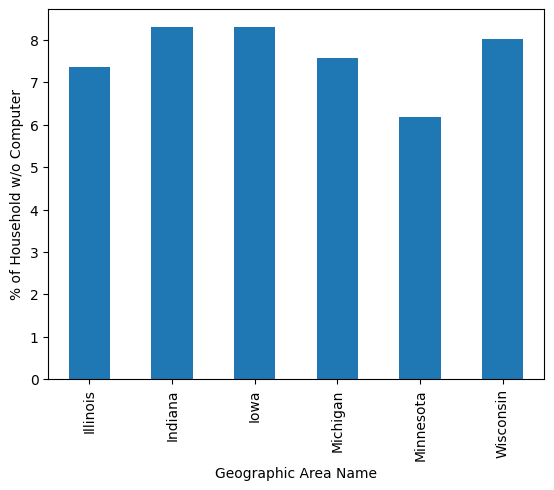

In [31]:
#Q22

wis_states['No Computer Fraction'] = wis_states['No Computer Fraction']*100
ax = wis_states['No Computer Fraction'].plot.bar(y = '% of Household w/o Computers')

ax.set_ylabel('% of Household w/o Computer')

ax

Text(0, 0.5, 'WI Households without Computers (Thousands)')

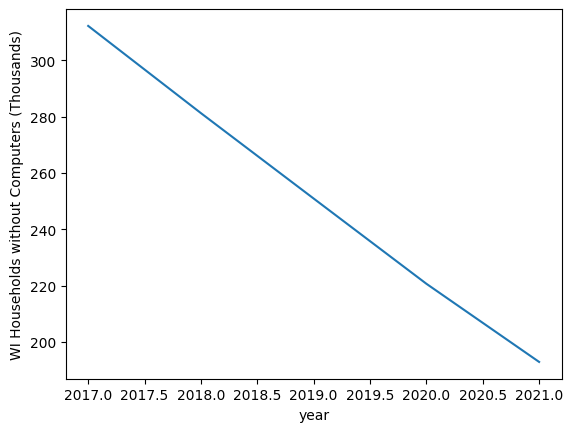

In [32]:
#Q23  
wisconsin_no_computer = {}
for year in census:
    wisconsin_no_computer[year] = census[year]['Estimate!!Total!!No Computer'].astype(int).loc['Wisconsin']/1000
wisconsin_no_computer
x_axis = list(wisconsin_no_computer.keys())
y_axis = list(wisconsin_no_computer.values())

ax = plt.plot(x_axis, y_axis)
plt.xlabel('year')
plt.ylabel('WI Households without Computers (Thousands)')

/tmp/ipykernel_201086/3353859416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones_tablets["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"] = phones_tablets["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"].astype(int)/1e6
/tmp/ipykernel_201086/3353859416.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phones_tablets["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"] = phones_tablets["Esti

<AxesSubplot:xlabel='Smartphones (millions)', ylabel='Tablets (millions)'>

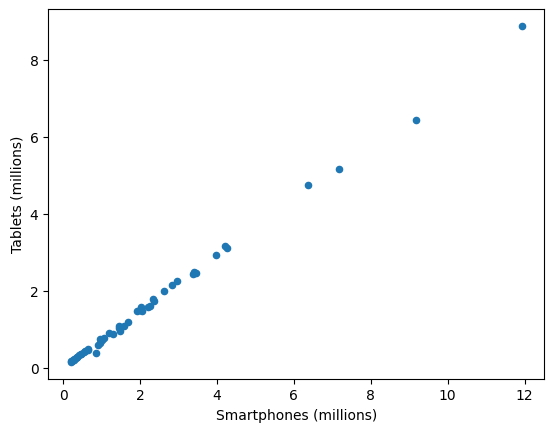

In [33]:
#Q24

phones_tablets = census[2021][["Estimate!!Total!!Has one or more types of computing devices!!Smartphone", "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"]]
phones_tablets["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"] = phones_tablets["Estimate!!Total!!Has one or more types of computing devices!!Smartphone"].astype(int)/1e6
phones_tablets["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"] = phones_tablets["Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"].astype(int)/1e6

ax = phones_tablets.plot.scatter(x = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone", y = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer")

ax.set_xlabel('Smartphones (millions)')
ax.set_ylabel('Tablets (millions)')

ax

In [34]:
#Q25

x = subprocess.check_output(f'git log', shell = True,cwd = 'flask', text = True)

#git log

logs = x.split("\n")
logs[0]


'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [35]:
#Q26

commits = []
for line in logs:
    if line.startswith('commit'):
        commits.append(line)
        
first_10 = commits[-10:]

first_10_numbers = []
for commit in first_10:
    first_10_numbers.append(commit.split(' ')[-1])

first_10_numbers

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [36]:
#Q27

commit_100_num = commits[-100].split(' ')[-1]

try:
    subprocess.check_output(f'git checkout {commit_100_num}', shell = True, cwd = 'flask')
except:
    subprocess.CalledProcessError
    
readme = open('flask/README', "r")
txt = readme.read()
readme.close()
txt

Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [37]:
subprocess.check_output(f'git checkout main', shell = True, cwd = 'flask')

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


b"Your branch is up to date with 'origin/main'.\n"

In [38]:
#Q28
merge_dict = {}
for line in logs:
    if 'Merge pull request' in line:
        username = str(line).split(' ')[-1].split('/')[0]
        if username in merge_dict.keys():
            merge_dict[username] += 1
        else:
            merge_dict[username] = 1
filter_merge_dict = {key: value for key, value in merge_dict.items() if value >= 10}
filter_merge_dict

{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [39]:
#Q29

try:
    msg = str(subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT))
except subprocess.CalledProcessError as e:
    msg = str(e.output, encoding = "utf-8")
msg

'ERROR: unknown command "instal" - maybe you meant "install"\n'

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

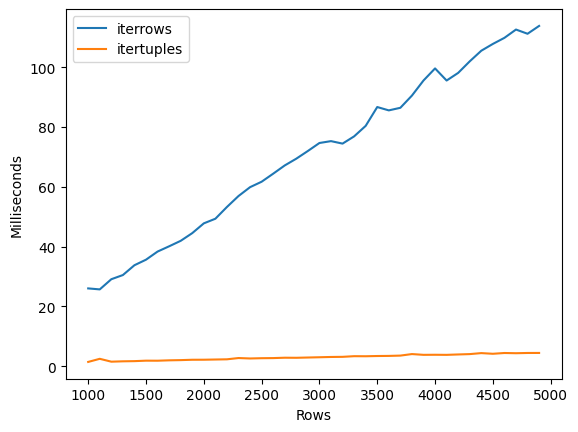

In [40]:
#Q30

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])

times_df = pd.DataFrame(dtype=float)

for i in range(1000, 5000, 100):
    df = rand_df(i)
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()

    t01 = time.time()
    for row in df.itertuples():
        pass
    t11 = time.time()
    
    times_df.at[i, "iterrows"] = (t1 -t0)*1000
    times_df.at[i, "itertuples"] = (t11 - t01)*1000
                 
ax = times_df.plot.line()
ax.set_xlabel('Rows')
ax.set_ylabel('Milliseconds')
ax

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

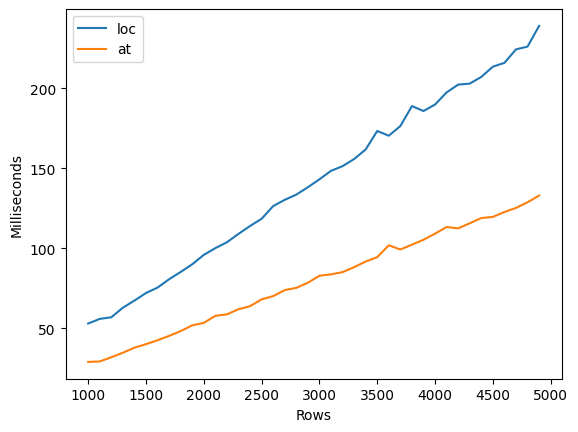

In [41]:
#Q31


times_df = pd.DataFrame(dtype=float)

for i in range(1000, 5000, 100):
    df = rand_df(i)
    t0 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()

    t01 = time.time()
    total = 0
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t11 = time.time()
    
    times_df.at[i, "loc"] = (t1 -t0)*1000
    times_df.at[i, "at"] = (t11 - t01)*1000
                 
ax = times_df.plot.line()
ax.set_xlabel('Rows')
ax.set_ylabel('Milliseconds')
ax

<AxesSubplot:xlabel='Rows', ylabel='Milliseconds'>

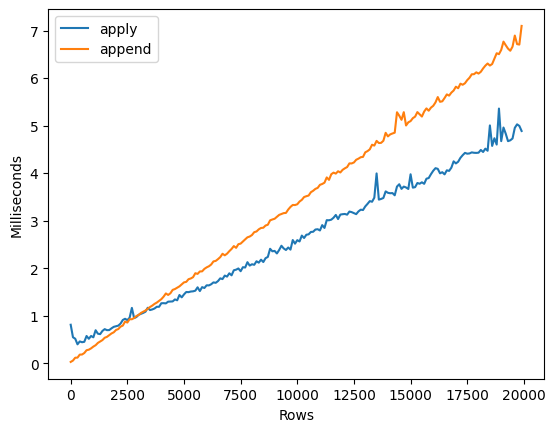

In [42]:
#Q32

def laugh(x):
    return "qwerty" * x

times_df = pd.DataFrame(dtype=float)

for i in range(0, 20000, 100):

    df = rand_df(i)
    t0 = time.time()

    result = df["A"].apply(laugh).tolist()
    t1 = time.time()

    t01 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t11 = time.time()     
    
    times_df.at[i, "apply"] = (t1 -t0)*1000
    times_df.at[i, "append"] = (t11 - t01)*1000

ax = times_df.plot.line()
ax.set_xlabel('Rows')
ax.set_ylabel('Milliseconds')
ax